In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns
import os 
import sys
from Backtester import Backtester
from simulator import Simulator
from utils import *
from datetime import datetime


os.chdir('/Users/yinki/OneDrive/Python/Crypto Whales')
print(os.getcwd())

Pool_address = '0xcbcdf9626bc03e24f779434178a73a0b4bad62ed' # WETH/WBTC pool 0.3% fee
simulator = Simulator(Address='0xcbcdf9626bc03e24f779434178a73a0b4bad62ed')


c:\Users\yinki\OneDrive\Python\Crypto Whales
c:\Users\yinki\OneDrive\Python\Crypto Whales
Initializing Backtester...


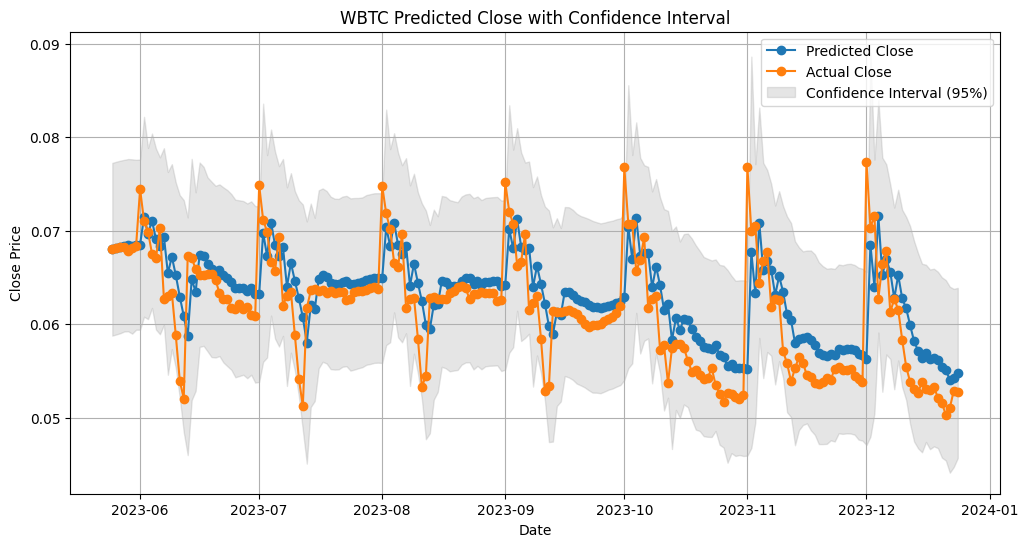

In [2]:
# Looking over our test period as well as our ARIMA-GARCH predictions

start_date = "2023-05-25"
end_date = "2023-12-24"
df = pd.read_csv('data/pools_daily_weth_btc_arima_garch.csv', index_col=0, parse_dates=True, sep=';').loc['2023-05-25':'2023-12-24']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Predicted Close (WBTC)'], label='Predicted Close', marker='o')
plt.plot(df.index, df['Close (WBTC)'], label='Actual Close', marker='o')
plt.fill_between(df.index, df['Predicted Close (WBTC)'] - 1.96 * df['Conditional Volatility'], df['Predicted Close (WBTC)'] + 1.96 * df['Conditional Volatility'], color='gray', alpha=0.2, label='Confidence Interval (95%)')
plt.title('WBTC Predicted Close with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# Simulating based on our desired parameters initial investment, number of individual windows and risk level

risk_param = 0.90
initial_investment = 1000000
windows = 10

results = simulator.simulate(windows, risk_param, initial_investment)

c:\Users\yinki\OneDrive\Python\Crypto Whales\src\simulator.py:50: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']


Test Period: 2023-05-25 to 2023-06-14
Lower Bound: 0.05597124772416764, Upper Bound: 0.0757715636672533


c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\simulator.py:50: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']


Initial Investment USD: 1000000, BTC-USD: 26225.4140625
Initial Amounts: 19.065475908536953 token0, 280.1827242846707 token1
Final Amounts: 17.61627376002582 token0, 301.47993228288465 token1
Simulated Position returned 0.16022031790134597 in  20  days, for an APR of  2.9240208016995646
Base position returned 1.6836259656339376e-17 in  20  days, for an APR of  3.0726173872819364e-16
Fees in token 0 and token 1 0.02736444284888654 0.49828594618879857
Total Fees in USD 2231.8181234072954
Your liquidity was active for: 35.83519198193112
Final Net Liquidity Value of LP Investment (WBTC):  38.151152290996535
Fees: 2231.8181234072954, Hedging Costs: 0, Payoff: 0
Current Value USD at end of period 2023-05-25 to 2023-06-14: 984053.5179732721 USD
HODL 50-50- Start Value: 1000000, End_Value: 982011.0076989578
-------------------------------------------------------------------
Test Period: 2023-06-15 to 2023-07-05
Lower Bound: 0.05436052989531858, Upper Bound: 0.07240949533939837


c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\simulator.py:50: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']


Initial Investment USD: 984053.5179732721, BTC-USD: 25195.00390625
Initial Amounts: 19.52874311182708 token0, 296.4473021028438 token1
Final Amounts: 14.654539708299744 token0, 370.4379547834602 token1
Simulated Position returned 0.3857247775455834 in  20  days, for an APR of  7.039477190206897
Base position returned 3.579440634538553e-17 in  20  days, for an APR of  6.532479158032859e-16
Fees in token 0 and token 1 0.0672670135318553 1.3688049294420364
Total Fees in USD 5857.163838715918
Your liquidity was active for: 48.55338692581255
Final Net Liquidity Value of LP Investment (WBTC):  39.03411676023573
Fees: 5857.163838715918, Hedging Costs: 0, Payoff: 535.8312500000029
Current Value USD at end of period 2023-06-15 to 2023-07-05: 1179488.7046659598 USD
HODL 50-50- Start Value: 982011.0076989578, End_Value: 1126956.9115217165
-------------------------------------------------------------------
Test Period: 2023-07-06 to 2023-07-26
Lower Bound: 0.05614529124887732, Upper Bound: 0.07536

c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\simulator.py:50: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']


Initial Investment USD: 1179488.7046659598, BTC-USD: 30405.30078125
Initial Amounts: 19.39610321818151 token0, 309.0707937886827 token1
Final Amounts: 20.64620167465375 token0, 289.15086874447553 token1
Simulated Position returned 0.19060606304518743 in  20  days, for an APR of  3.4785606505746705
Base position returned 1.8779358654774328e-17 in  20  days, for an APR of  3.427232954496315e-16
Fees in token 0 and token 1 0.03901841448608239 0.5492464061616484
Total Fees in USD 2781.6531636797517
Your liquidity was active for: 29.977183717256406
Final Net Liquidity Value of LP Investment (WBTC):  38.744231880523685
Fees: 2781.6531636797517, Hedging Costs: 0, Payoff: 0
Current Value USD at end of period 2023-07-06 to 2023-07-26: 1143162.2439394789 USD
HODL 50-50- Start Value: 1126956.9115217165, End_Value: 1073987.9513403391
-------------------------------------------------------------------
Test Period: 2023-07-27 to 2023-08-16
Lower Bound: 0.05489695043504098, Upper Bound: 0.07211095126

c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\simulator.py:50: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']


Initial Investment USD: 1143162.2439394789, BTC-USD: 29341.669921875
Initial Amounts: 19.480183762261277 token0, 306.41837490017645 token1
Final Amounts: 17.411351480944916 token0, 338.96058463076866 token1
Simulated Position returned 0.07444646216609298 in  20  days, for an APR of  1.3586479345311968
Base position returned 7.550934675274211e-18 in  20  days, for an APR of  1.3780455782375432e-16
Fees in token 0 and token 1 0.01081992166878995 0.29220748863054097
Total Fees in USD 1119.8834935796635
Your liquidity was active for: 20.30595964549054
Final Net Liquidity Value of LP Investment (WBTC):  38.965169575270764
Fees: 1119.8834935796635, Hedging Costs: 0, Payoff: 0
Current Value USD at end of period 2023-07-27 to 2023-08-16: 1128222.1566677997 USD
HODL 50-50- Start Value: 1073987.9513403391, End_Value: 1066726.2428071275
-------------------------------------------------------------------
Test Period: 2023-08-17 to 2023-09-06
Lower Bound: 0.05552286021860325, Upper Bound: 0.0721665

c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\simulator.py:50: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']


Initial Investment USD: 1128222.1566677997, BTC-USD: 28534.513671875
Initial Amounts: 19.769430270329615 token0, 314.63859008037633 token1
Final Amounts: 20.939474858167404 token0, 296.0168506364748 token1
Simulated Position returned 0.23739835523899608 in  20  days, for an APR of  4.332519983111678
Base position returned 2.013302281295686e-17 in  20  days, for an APR of  3.6742766633646267e-16
Fees in token 0 and token 1 0.04884247130651712 0.7121436745275189
Total Fees in USD 3550.442481743861
Your liquidity was active for: 31.813791932069968
Final Net Liquidity Value of LP Investment (WBTC):  39.446937206461115
Fees: 3550.442481743861, Hedging Costs: 0, Payoff: 0
Current Value USD at end of period 2023-08-17 to 2023-09-06: 1026729.5273205945 USD
HODL 50-50- Start Value: 1066726.2428071275, End_Value: 947095.3522836554
-------------------------------------------------------------------
Test Period: 2023-09-07 to 2023-09-27
Lower Bound: 0.05328956000201085, Upper Bound: 0.075921670840

c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\simulator.py:50: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']


Initial Investment USD: 1026729.5273205945, BTC-USD: 25740.744140625
Initial Amounts: 19.94366444325461 token0, 314.2169839986278 token1
Final Amounts: 14.270656777412725 token0, 403.5965142265761 token1
Simulated Position returned 0.11910183353277853 in  20  days, for an APR of  2.173608461973208
Base position returned 1.3310070285581495e-17 in  20  days, for an APR of  2.4290878271186226e-16
Fees in token 0 and token 1 0.015880687603798536 0.5348556339372191
Total Fees in USD 1919.0978195219614
Your liquidity was active for: 34.15342068548254
Final Net Liquidity Value of LP Investment (WBTC):  39.804169331773316
Fees: 1919.0978195219614, Hedging Costs: 0, Payoff: 0
Current Value USD at end of period 2023-09-07 to 2023-09-27: 1023827.253523297 USD
HODL 50-50- Start Value: 947095.3522836554, End_Value: 945063.3285434198
-------------------------------------------------------------------
Test Period: 2023-09-28 to 2023-10-18
Lower Bound: 0.04701304708907616, Upper Bound: 0.0696338852064

c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\simulator.py:50: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']


Initial Investment USD: 1023827.253523297, BTC-USD: 26419.205078125
Initial Amounts: 19.3765719009279 token0, 318.916074062957 token1
Final Amounts: 11.188245676496688 token0, 453.68650022473355 token1
Simulated Position returned 0.30533018619903207 in  20  days, for an APR of  5.572275898132335
Base position returned 3.735382060452908e-17 in  20  days, for an APR of  6.817072260326557e-16
Fees in token 0 and token 1 0.04686340298626754 1.336667047530359
Total Fees in USD 5254.348398652852
Your liquidity was active for: 48.45983934104811
Final Net Liquidity Value of LP Investment (WBTC):  39.241260158283296
Fees: 5254.348398652852, Hedging Costs: 0, Payoff: 0
Current Value USD at end of period 2023-09-28 to 2023-10-18: 1048581.5637892154 USD
HODL 50-50- Start Value: 945063.3285434198, End_Value: 977767.2614183669
-------------------------------------------------------------------
Test Period: 2023-10-19 to 2023-11-08
Lower Bound: 0.04522580895704864, Upper Bound: 0.06686475207989598


c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\simulator.py:50: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']


Initial Investment USD: 1048581.5637892154, BTC-USD: 28399.84375
Initial Amounts: 18.461044592705118 token0, 335.7199023446217 token1
Final Amounts: 15.241753774225414 token0, 394.26371842023065 token1
Simulated Position returned 0.607782970590978 in  20  days, for an APR of  11.09203921328535
Base position returned 7.390442429996936e-17 in  20  days, for an APR of  1.348755743474441e-15
Fees in token 0 and token 1 0.11041383502626131 2.218167238955652
Total Fees in USD 9884.023044270309
Your liquidity was active for: 56.44622277522062
Final Net Liquidity Value of LP Investment (WBTC):  37.26436442745657
Fees: 9884.023044270309, Hedging Costs: 0, Payoff: 1297.3249755859376
Current Value USD at end of period 2023-10-19 to 2023-11-08: 1295460.9617198922 USD
HODL 50-50- Start Value: 977767.2614183669, End_Value: 1201127.7402248573
-------------------------------------------------------------------
Test Period: 2023-11-09 to 2023-11-29
Lower Bound: 0.04618116239926203, Upper Bound: 0.07277

c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\simulator.py:50: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']


Initial Investment USD: 1295460.9617198922, BTC-USD: 35857.17578125
Initial Amounts: 18.064180090799272 token0, 341.5605843646375 token1
Final Amounts: 19.2510613361709 token0, 319.118832250627 token1
Simulated Position returned 0.5947905157237332 in  20  days, for an APR of  10.854926911958133
Base position returned 8.566833570334966e-17 in  20  days, for an APR of  1.5634471265861316e-15
Fees in token 0 and token 1 0.10906885360019496 1.8607303536202897
Total Fees in USD 9042.270832516428
Your liquidity was active for: 60.891027071670486
Final Net Liquidity Value of LP Investment (WBTC):  36.27746508999999
Fees: 9042.270832516428, Hedging Costs: 0, Payoff: 0
Current Value USD at end of period 2023-11-09 to 2023-11-29: 1393365.2031029442 USD
HODL 50-50- Start Value: 1201127.7402248573, End_Value: 1295487.6214109268
-------------------------------------------------------------------
Test Period: 2023-11-30 to 2023-12-24
Lower Bound: 0.04542779868026784, Upper Bound: 0.06446992057317845

c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\Backtester.py:31: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']
c:\Users\yinki\OneDrive\Python\Crypto Whales\src\simulator.py:50: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  return self.btc_price.loc[date, 'Close']


Window 1
Window 2
Window 3
Window 4
Window 5
Window 6
Window 7
Window 8
Window 9
Window 10


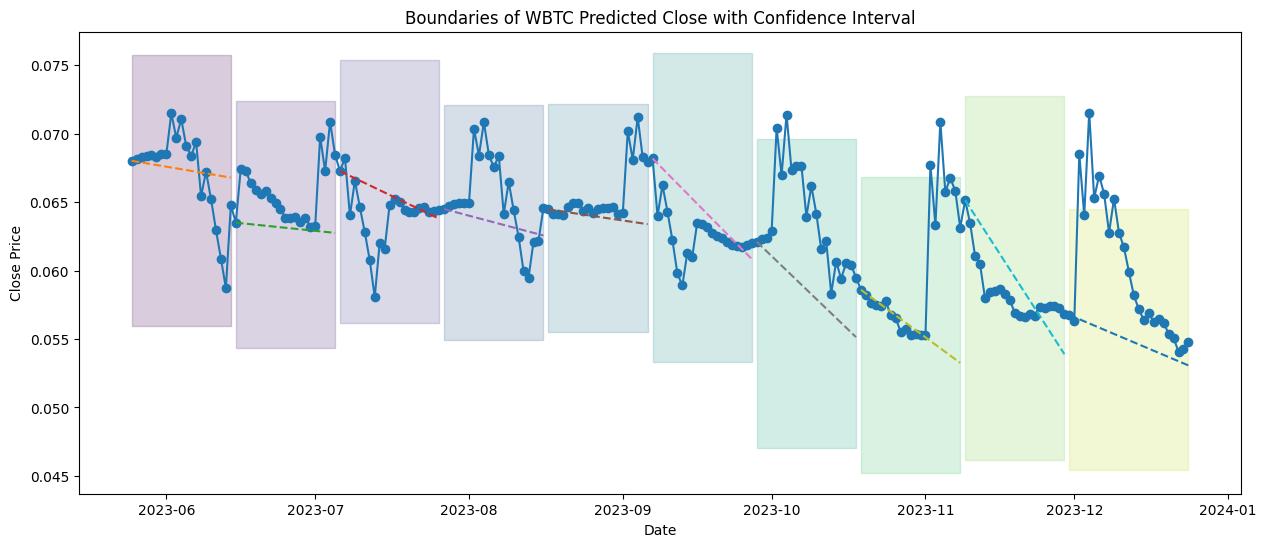

In [17]:
# Plot the windows
# Plotting
start_dates = results['Start Date']
end_dates = results['End Date']
start_prices = results['Start Price (WBTC)']
end_prices = results['End Price (WBTC)']
lower_bounds = results['Lower Bound']
upper_bounds = results['Upper Bound']
df.index = pd.to_datetime(df.index)

cmap = cm.get_cmap('viridis')

plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Predicted Close (WBTC)'], label='Predicted Close', marker='o')
plt.title('Boundaries of WBTC Predicted Close with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Close Price')
# Plotting each window with its boundaries
for i, (start_date, end_date, start_price, end_price, lower_bound, upper_bound) in enumerate(zip(start_dates, end_dates, start_prices, end_prices, lower_bounds, upper_bounds)):
    print(f'Window {i + 1}')
    #print(f'Start Date: {start_date}')
    #print(f'End Date: {end_date}')
    #print(f'Start Price: {start_price}')
    #print(f'End Price: {end_price}')
    window = df[(df.index >= start_date) & (df.index <= end_date)]
    #print(window)
    color = cmap(i / windows)
    # Convert DatetimeIndex to list of strings for plotting dotted line
    date_strings = [str(date) for date in window.index]

    # Plot the start and end prices as a dotted line
    plt.plot(window.index[[0, -1]], [start_price, end_price], linestyle='--', label=f'Estimated Trend Line {i + 1}')

    # Plot the lower and upper bounds
    plt.fill_between(window.index, lower_bound, upper_bound, color=color, alpha=0.2, label=f'Bounds {i + 1}')

In [5]:
window = df.loc[(df.index >= pd.to_datetime(start_date)) & (df.index <= pd.to_datetime(end_date))]
window

,Close (WBTC),Predicted Close (WBTC),Conditional Volatility
2023-11-30,0.053802,0.056753,0.004691
2023-12-01,0.077372,0.056340,0.004719
2023-12-02,0.070340,0.068513,0.010472
2023-12-03,0.071616,0.064032,0.006926
2023-12-04,0.062738,0.071542,0.006337
2023-12-05,0.066413,0.065303,0.006387
2023-12-06,0.067806,0.066937,0.005188
2023-12-07,0.061301,0.065619,0.004757
2023-12-08,0.062716,0.062765,0.004955
2023-12-09,0.061554,0.065260,0.004659


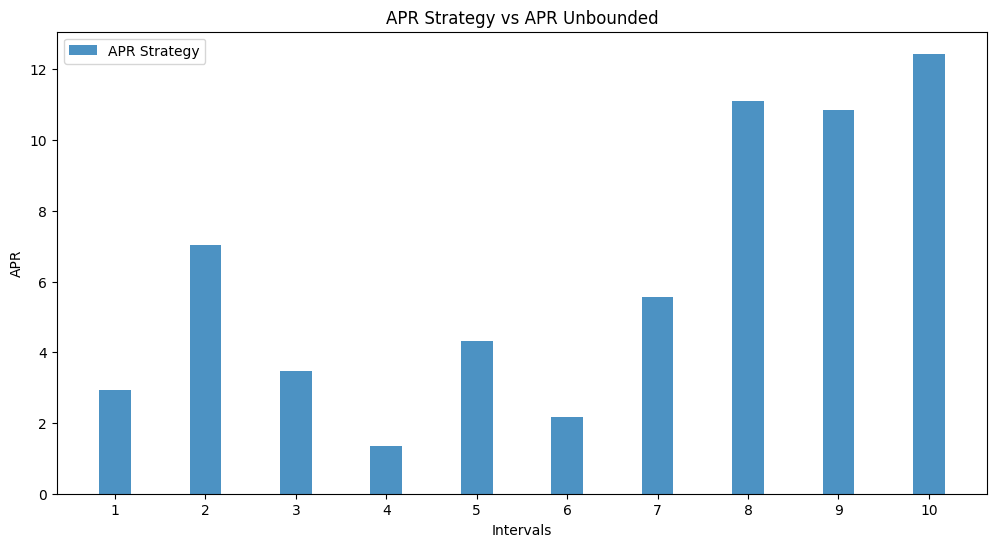

,APR Strategy,APR Unbounded
1,2.924021,3.072617e-16
2,7.039477,6.532479e-16
3,3.478561,3.427233e-16
4,1.358648,1.378046e-16
5,4.332520,3.674277e-16
6,2.173608,2.429088e-16
7,5.572276,6.817072e-16
8,11.092039,1.348756e-15
9,10.854927,1.563447e-15
10,12.442251,1.332263e-15


In [6]:
results.keys()

# Plotting APR Strategy vs APR Unbounded Bar Graphs

# Generate x-axis values
intervals = np.arange(1, windows + 1)

# Plotting APR Strategy
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
bar_positions_strategy = intervals 
ax.bar(bar_positions_strategy, results['APR Strategy'], bar_width, label='APR Strategy', alpha=0.8)
#ax.bar(bar_positions_unbounded, results['APR Unbounded'], bar_width, label='APR Unbounded', alpha=0.8)
ax.set_xlabel('Intervals')
ax.set_ylabel('APR')
ax.set_title('APR Strategy vs APR Unbounded')
ax.set_xticks(intervals)
ax.legend()
plt.show()

'''
# Plotting APR Unbounded
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
bar_positions_unbounded = intervals 
ax.bar(bar_positions_unbounded, results['APR Unbounded'], bar_width, label='APR Unbounded', alpha=0.8, color='orange')
ax.set_xlabel('Intervals')
ax.set_ylabel('APR')
ax.set_title('APR Strategy')
ax.set_xticks(intervals)
ax.legend()
plt.show()
'''


# Table of APRs
apr_results = pd.DataFrame({
    'APR Strategy': results['APR Strategy'],
    'APR Unbounded': results['APR Unbounded']
}, index=intervals)
apr_results

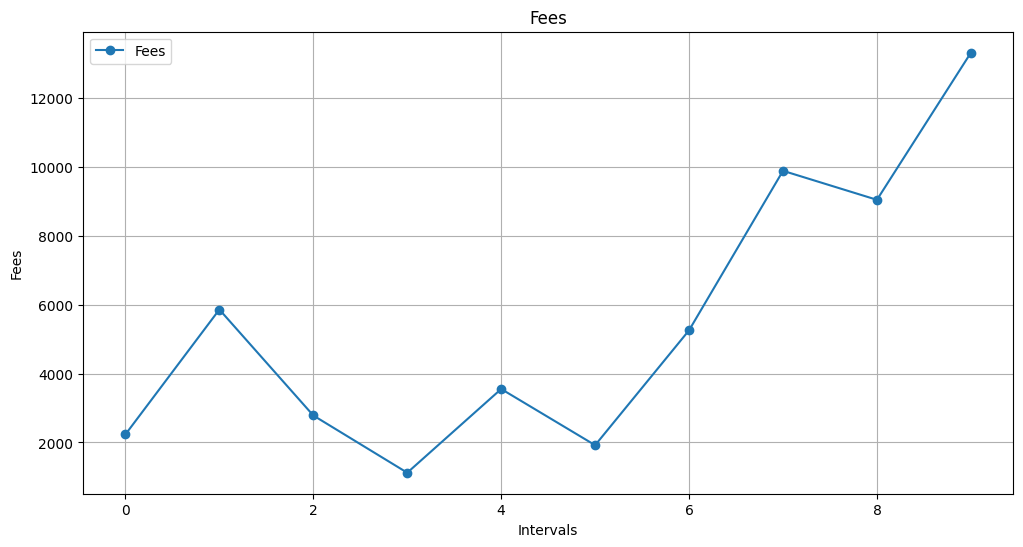

In [7]:
# Plot Fees line graph
plt.figure(figsize=(12, 6))
plt.plot(results['Fee USD'], label='Fees', marker='o')
plt.title('Fees')
plt.xlabel('Intervals')
plt.ylabel('Fees')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 0, 'Intervals')

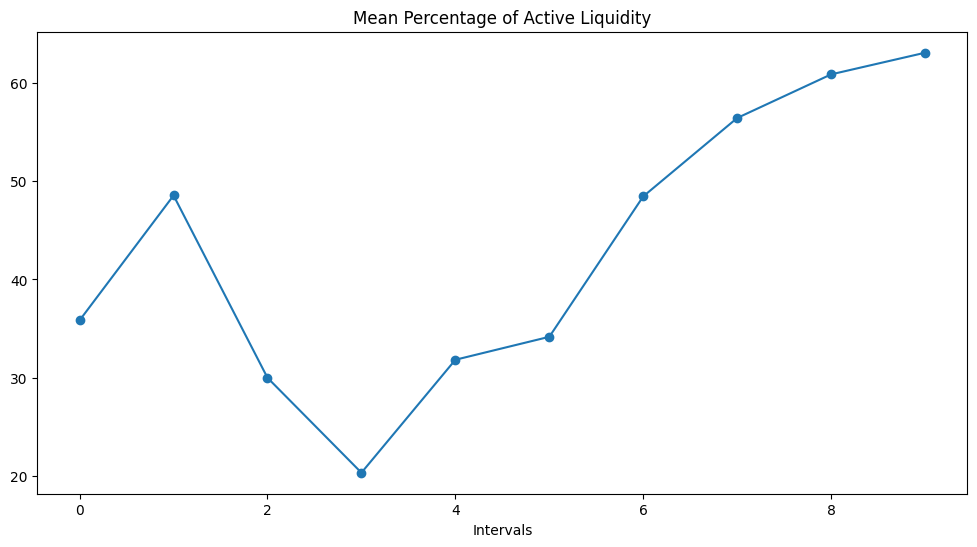

In [8]:
# Plot Mean Percentage of Active Liquidity
plt.figure(figsize=(12, 6))
plt.plot(results['Mean Percentage of Active Liquidity'], label='Mean Percentage of Active Liquidity', marker='o')
plt.title('Mean Percentage of Active Liquidity')
plt.xlabel('Intervals')


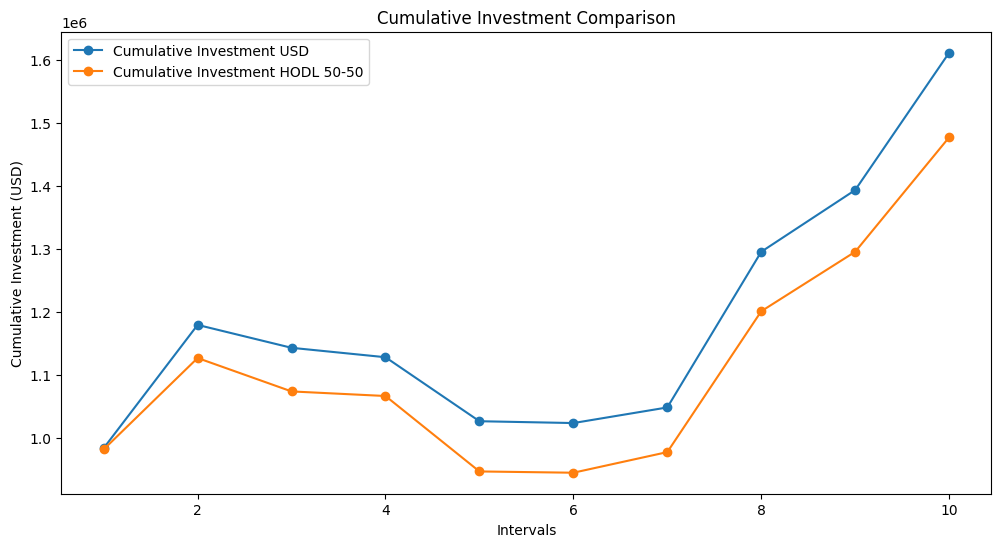

<AxesSubplot: title={'center': 'Cumulative Investment Comparison'}>

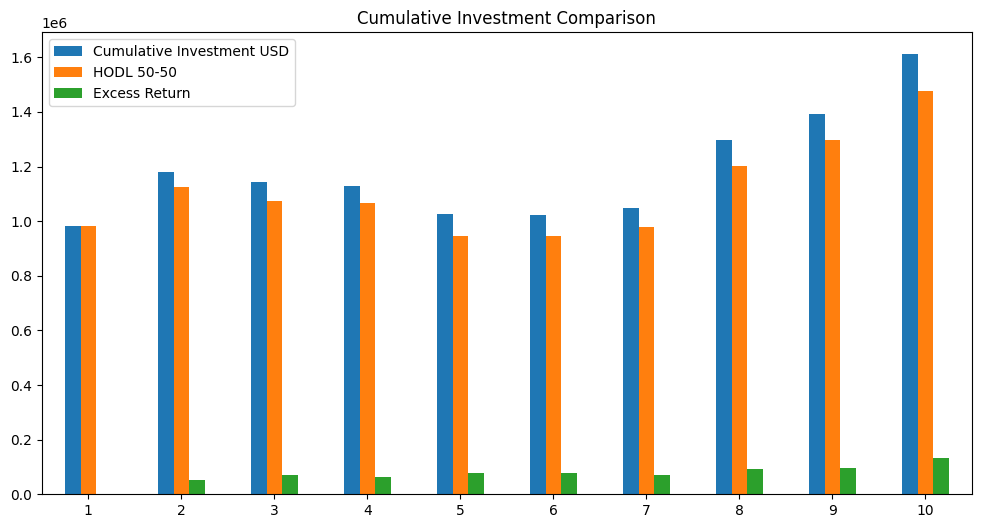

In [9]:
# Plot Cumulative Investment USD vs HODL 50-50

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(intervals, results['Cumulative Investment USD'], label='Cumulative Investment USD', marker='o')
ax.plot(intervals, results['HODL 50-50'], label='Cumulative Investment HODL 50-50', marker='o')

ax.set_xlabel('Intervals')
ax.set_ylabel('Cumulative Investment (USD)')
ax.set_title('Cumulative Investment Comparison')
ax.legend()

plt.show()


# Show Table of Cumulative Investment USD vs HODL 50-50
cumulative_results = pd.DataFrame({
    'Cumulative Investment USD': results['Cumulative Investment USD'],
    'HODL 50-50': results['HODL 50-50']
}, index=intervals)
cumulative_results['Excess Return'] = (cumulative_results['Cumulative Investment USD'] - cumulative_results['HODL 50-50'])

cumulative_results.plot.bar(figsize=(12, 6), rot=0, title='Cumulative Investment Comparison')

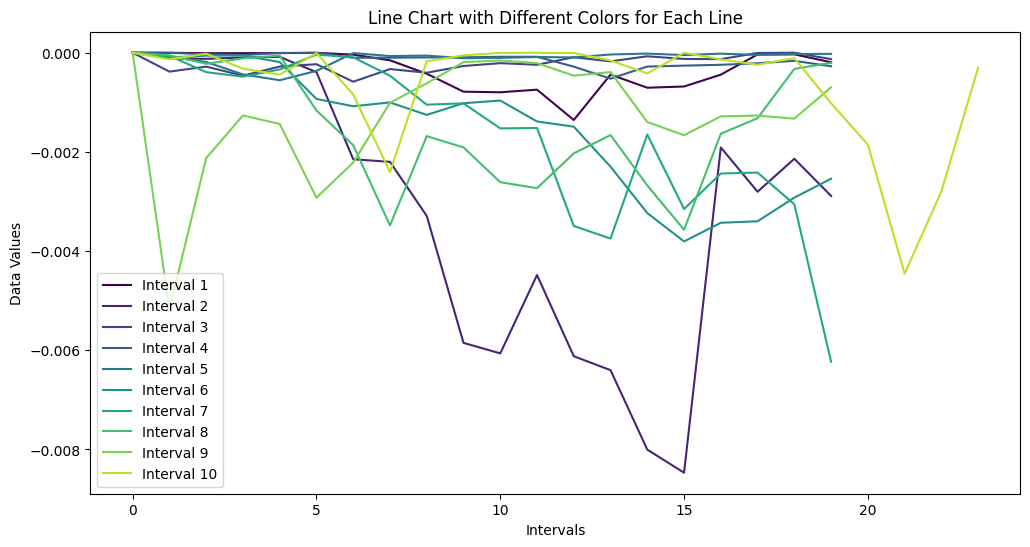

,Mean,Standard Deviation,Minimum,Maximum
1,-0.000343,0.000380,-0.001357,0.0
2,-0.003179,0.002722,-0.008470,0.0
3,-0.000220,0.000155,-0.000585,0.0
4,-0.000144,0.000131,-0.000523,0.0
5,-0.000118,0.000150,-0.000555,0.0
6,-0.001558,0.001240,-0.003806,0.0
7,-0.001658,0.001603,-0.006232,0.0
8,-0.001466,0.001144,-0.003571,0.0
9,-0.001291,0.001166,-0.005173,0.0
10,-0.000662,0.001096,-0.004455,0.0


In [10]:
IL = results['Impermanent Loss']

x_values = [i for i in range(1, windows + 1)]

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

for i, data in enumerate(IL):
    color = plt.cm.viridis(i / len(IL))  # Use a colormap to get different colors for each line
    ax.plot(range(len(data)), data, label=f'Interval {i+1}', color=color)

ax.set_xlabel('Intervals')
ax.set_ylabel('Data Values')
ax.set_title('Line Chart with Different Colors for Each Line')
ax.legend()

plt.show()

IL_Statistics = []
for i in range(len(IL)):
    IL_Statistics.append([np.mean(IL[i]), np.std(IL[i]), np.min(IL[i]), np.max(IL[i])])
    
IL_Statistics = pd.DataFrame(IL_Statistics, columns=['Mean', 'Standard Deviation', 'Minimum', 'Maximum'], index=x_values)
IL_Statistics


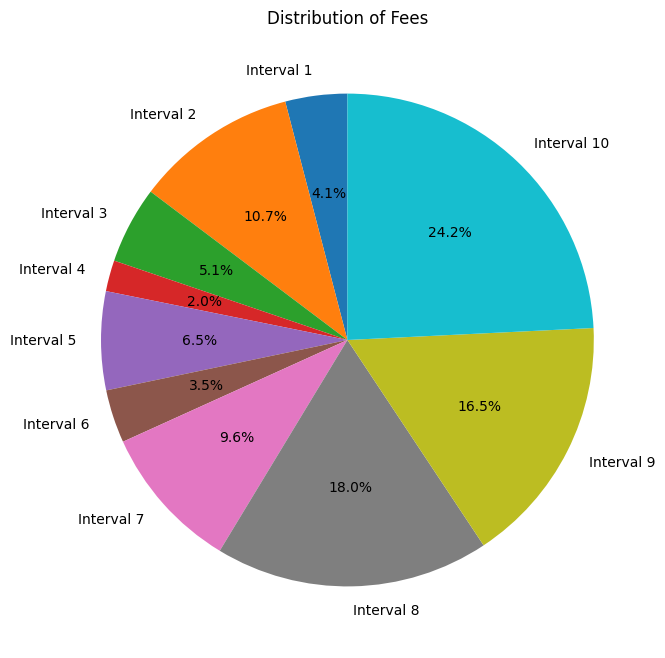

In [11]:
# Pie Chart of Fees Earned, dont really say much
fees = results['Fee USD']

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(fees, labels=[f'Interval {i+1}' for i in range(len(fees))], autopct='%1.1f%%', startangle=90)
ax.set_title('Distribution of Fees')
plt.show()